## HEART DISEASE 
Cardiovascular diseases are considered as a leading cause of death globally. A large set of victims of CVD(Cardiovascular Disease) attribute their demise owing to either heart disease or stroke & in recent years such CVDs are observed even in people below 70yrs of age. The dataset contains 11 such features of patients who suffer from CVD to help predict a possible CVD due to heart disease.

In [21]:
import opendatasets as od
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
import seaborn as sns

In [22]:
res = od.download_kaggle_dataset('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction',data_dir='Datasets')

Skipping, found downloaded files in "Datasets/heart-failure-prediction" (use force=True to force download)


In [23]:
import glob

Here we make use of **glob** to find all files within a directory containing a **.csv** extension in it.

In [24]:
os.getcwd()

'/Users/soumyadipsikdar/Desktop/Data Science/Data_Analysis'

In [25]:
res = glob.glob(pathname='/Users/soumyadipsikdar/Desktop/Data Science/Data_Analysis/Datasets/**/*.csv',recursive=True)

In [26]:
print(f"There are {len(res)} csv files currently within Datasets folder")

There are 2 csv files currently within Datasets folder


In [27]:
res

['/Users/soumyadipsikdar/Desktop/Data Science/Data_Analysis/Datasets/AB_NYC_2019.csv',
 '/Users/soumyadipsikdar/Desktop/Data Science/Data_Analysis/Datasets/heart-failure-prediction/heart.csv']

In [28]:
heartdisease_df = pd.read_csv(res[-1])
heartdisease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
heartdisease_df.shape

(918, 12)

From above we see there exists 918 observations and each having 12 features.

Let us get the summary statistics of all the numerical features.

In [30]:
heartdisease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the **Cholestrol** reading we see that top 25% of the population has level >=267 mm/dL where a value >=240 mm/dL is considered high and puts one in line for a potential
heart attack.

Looking at the **FastingBS** values where with FastingBS value > 120 mg/dL indicated by 1 & 0 otherwise we observe that for majority of the population it remains below the level.

The values for **RestingBP** which measures the **systolic pressure** i.e. force with which heart contracts and pumps blood into the arteries ,about half of the population suffers from **Hypertension/High Blood Pressure**.

Let's see if there exists any missing values in which case we impute values prior to EDA.

In [31]:
heartdisease_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [32]:
ages_of_subjects = list(heartdisease_df.Age.unique())
print(f"All subjects in the dataset has age in the range {min(ages_of_subjects)} to {max(ages_of_subjects)} yrs")

All subjects in the dataset has age in the range 28 to 77 yrs


### VISUALIZE DISTRIBUTION OF SUBJECTS WITH AND WITHOUT HEART DISEASE
Display histogram of subjects suffering from heart disease and are normal.

In [33]:
print("Number of unique values/categories of various features")
heartdisease_df.nunique()


Number of unique values/categories of various features


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

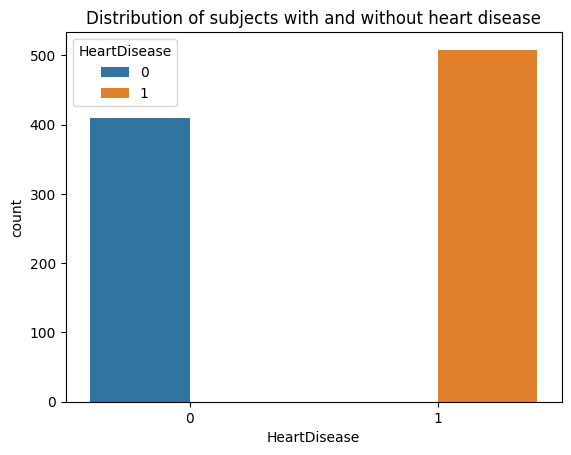

In [34]:
sns.countplot(data=heartdisease_df,x=heartdisease_df['HeartDisease'],hue=heartdisease_df['HeartDisease'])
plt.title("Distribution of subjects with and without heart disease")
plt.show()

In [35]:
subject_distribution_disease = dict(heartdisease_df['HeartDisease'].value_counts())
print(f"{(subject_distribution_disease[1]/len(heartdisease_df))*100:.2f}% of subjects suffer from heart disease")

55.34% of subjects suffer from heart disease


Let us find out the age range of subjects who suffer from heart disease

In [36]:
heartdiseasesubjects_df = heartdisease_df[heartdisease_df['HeartDisease']==1]
nonheartdiseasesubjects_df = heartdisease_df[heartdisease_df['HeartDisease']==0]

In [37]:
heartdiseasesubjects_df.reset_index(inplace=True)
nonheartdiseasesubjects_df.reset_index(inplace=True)

In [38]:
print(f"subjects with heart disease has age range {heartdiseasesubjects_df['Age'].min()} to {heartdiseasesubjects_df['Age'].max()} yrs")
print(f"subjects with no heart disease has age range {nonheartdiseasesubjects_df['Age'].min()} to {nonheartdiseasesubjects_df['Age'].max()} yrs")

subjects with heart disease has age range 31 to 77 yrs
subjects with no heart disease has age range 28 to 76 yrs


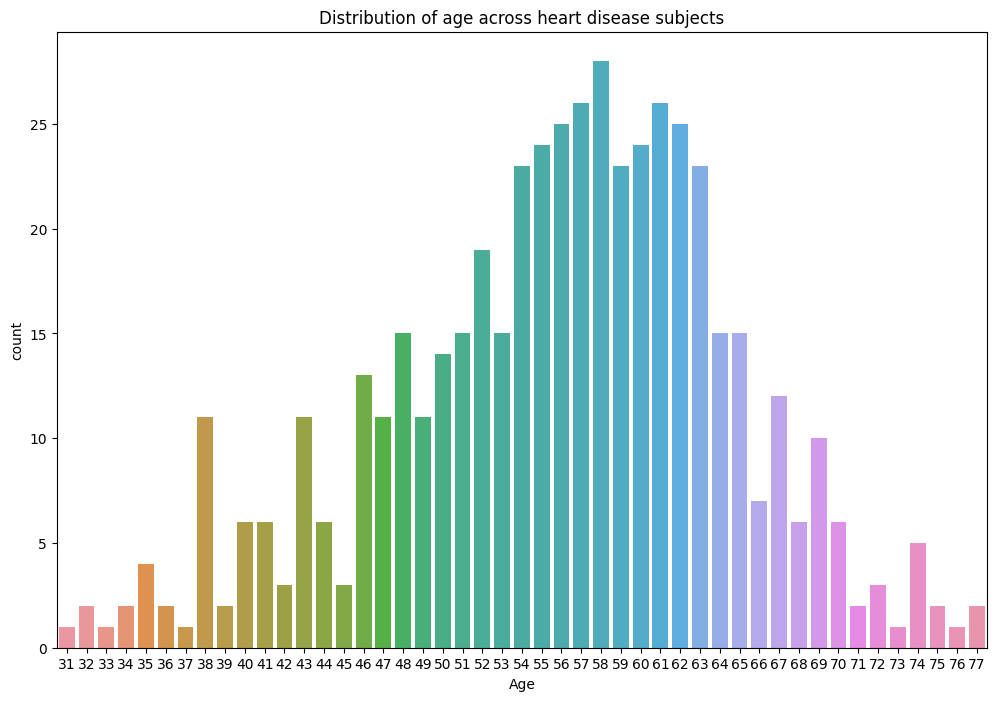

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(data=heartdiseasesubjects_df,x=heartdiseasesubjects_df['Age'])
plt.title("Distribution of age across heart disease subjects")
plt.show()

In [40]:
print(f"The mean age of heart disease subjects is {heartdiseasesubjects_df['Age'].mean()} yrs with {heartdiseasesubjects_df['Age'].std()} yrs variation")

The mean age of heart disease subjects is 55.8996062992126 yrs with 8.727055566369488 yrs variation


Let us look at values of cholestrol,FastingBS, RestingBp, chest-pain type & gender of subjects who suffer from heart disease.

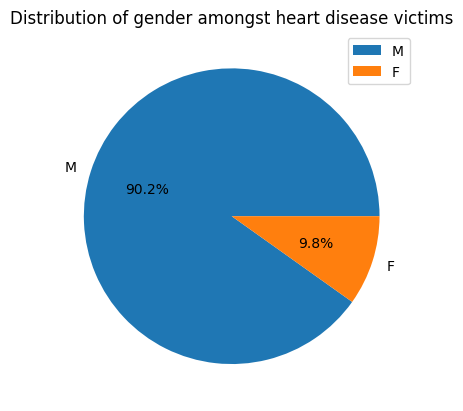

In [41]:
plt.pie(list(heartdiseasesubjects_df['Sex'].value_counts()),labels=list(dict(heartdiseasesubjects_df['Sex'].value_counts()).keys()),autopct="%0.1f%%")
plt.title("Distribution of gender amongst heart disease victims")
plt.legend(list(dict(heartdiseasesubjects_df['Sex'].value_counts()).keys()))
plt.show()

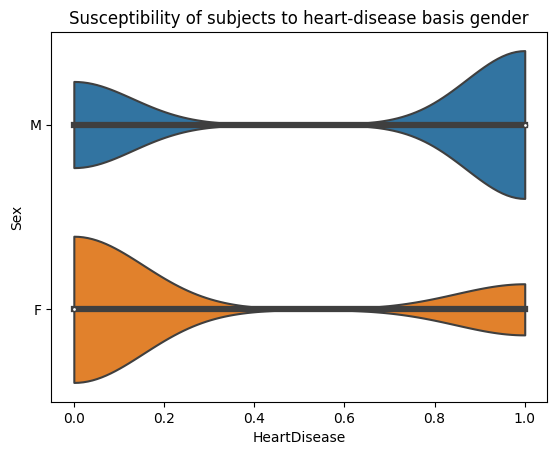

In [81]:
sns.violinplot(data=heartdisease_df,x='HeartDisease',y='Sex',cut=0)
plt.title("Susceptibility of subjects to heart-disease basis gender")
plt.show()

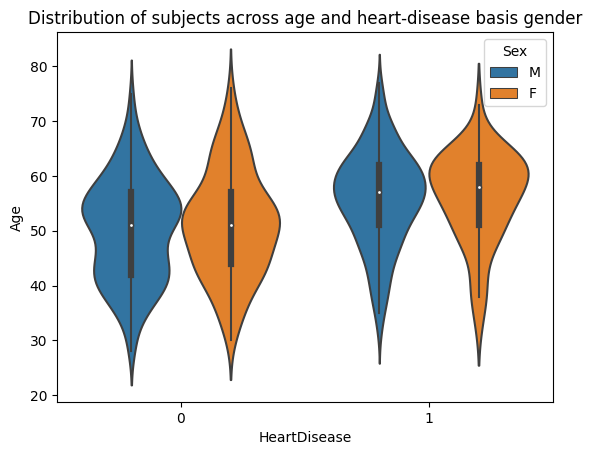

In [86]:
sns.violinplot(data=heartdisease_df,x="HeartDisease",y='Age',hue='Sex')
plt.title("Distribution of subjects across age and heart-disease basis gender")
plt.show()

As can be observed above a majority of heart disease victims are male.

Let us look into the cholestrol values of male subjects and compare it with female subjects.

In [42]:
male_victims_cholestrol_ct=dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['Cholesterol'].value_counts())
female_victims_cholestrol_ct=dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['Cholesterol'].value_counts())

In [43]:
print(f"Amongst the male victims the cholesterol values ranges between {min(list(male_victims_cholestrol_ct.keys()))} mm/dL and {max(list(male_victims_cholestrol_ct.keys()))} mm/dL with mean of {np.mean((list(male_victims_cholestrol_ct.keys())))} mm/dL")
print(f"Amongst the female victims the cholesterol values ranges between {min(list(female_victims_cholestrol_ct.keys()))} mm/dL and {max(list(female_victims_cholestrol_ct.keys()))} mm/dL with mean of {np.mean((list(female_victims_cholestrol_ct.keys())))} mm/dL")

Amongst the male victims the cholesterol values ranges between 0 mm/dL and 603 mm/dL with mean of 251.08074534161491 mm/dL
Amongst the female victims the cholesterol values ranges between 0 mm/dL and 409 mm/dL with mean of 273.6111111111111 mm/dL


From above we observe that even though it is predominantly the men who are at risk of developing a heart disease on an average the cholesterol value in female are found
to be higher than male.

This shows that it's not apparent from just observing cholesterol values to figure out whether someone is more susceptible to heart attacks/stroke. Cholesterol which are of 2 types namely LDL(Bad) & HDL(Good) has different outcomes when present in body. While the former blocks arteries thereby blocking blood flow through it resulting in the disease whereas the later reduces concentration of LDL and hence minimises the risk of develoing a heart attack/stroke.



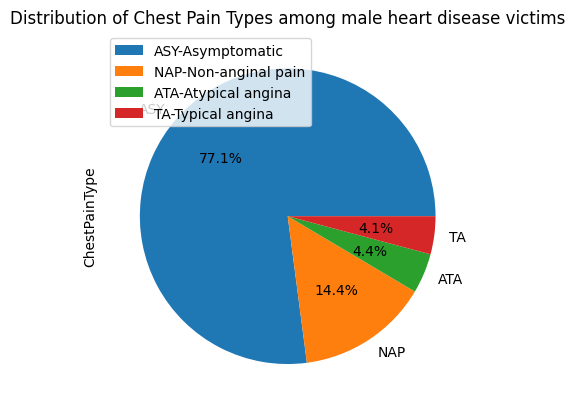

In [44]:
heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['ChestPainType'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of Chest Pain Types among male heart disease victims")
plt.legend(['ASY-Asymptomatic','NAP-Non-anginal pain','ATA-Atypical angina','TA-Typical angina'])
plt.show()

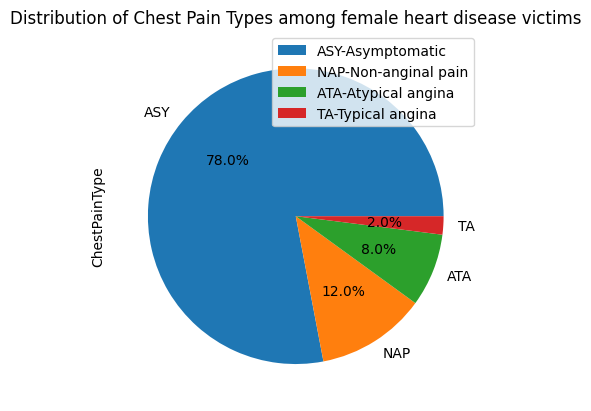

In [45]:
heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['ChestPainType'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of Chest Pain Types among female heart disease victims")
plt.legend(['ASY-Asymptomatic','NAP-Non-anginal pain','ATA-Atypical angina','TA-Typical angina'])
plt.show()

From both the above we find heart-attacks/stroke mostly turns out **ASY** or **Asymptomatic** i.e. shows no manifestation of symtomps in victims both in male as well as female
& hence is often termed as **SILENT KILLER** thereby rendering the disease difficult to diagnose unless periodic measurements are done.

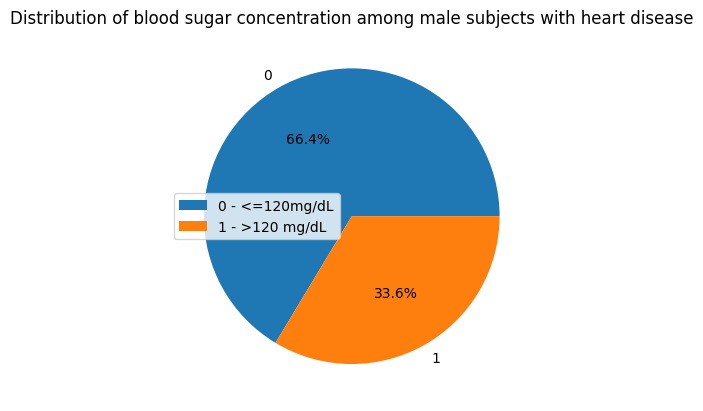

In [46]:
male_victims_fastingBS_ct = dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['FastingBS'].value_counts())
female_victims_fastingBS_ct = dict(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['FastingBS'].value_counts())

plt.pie(list(male_victims_fastingBS_ct.values()),labels=list(male_victims_fastingBS_ct.keys()),autopct="%0.1f%%")
plt.title("Distribution of blood sugar concentration among male subjects with heart disease")
plt.legend(['0 - <=120mg/dL','1 - >120 mg/dL'])
plt.show()

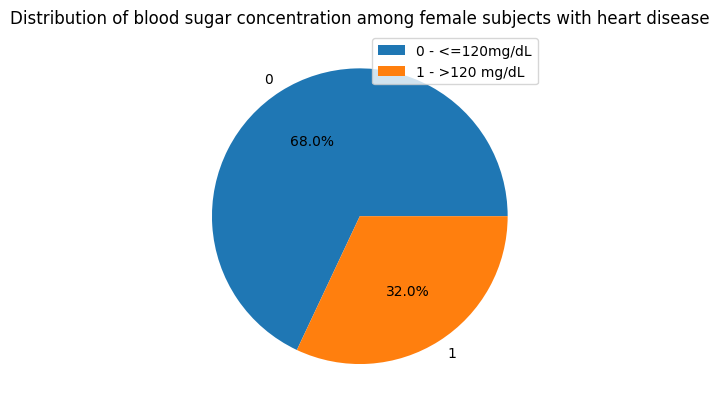

In [47]:
plt.pie(list(female_victims_fastingBS_ct.values()),labels=list(female_victims_fastingBS_ct.keys()),autopct="%0.1f%%")
plt.title("Distribution of blood sugar concentration among female subjects with heart disease")
plt.legend(['0 - <=120mg/dL','1 - >120 mg/dL'])
plt.show()

From above we observe that for both male & female heart disease victims a majority shows lower blood sugar levels which is <=120 mg/dL.

In [48]:
male_victims_restingBP_ct = list(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['M'])]['RestingBP'])
female_victims_fastingBS_ct = list(heartdiseasesubjects_df[heartdiseasesubjects_df['Sex'].isin(['F'])]['RestingBP'])

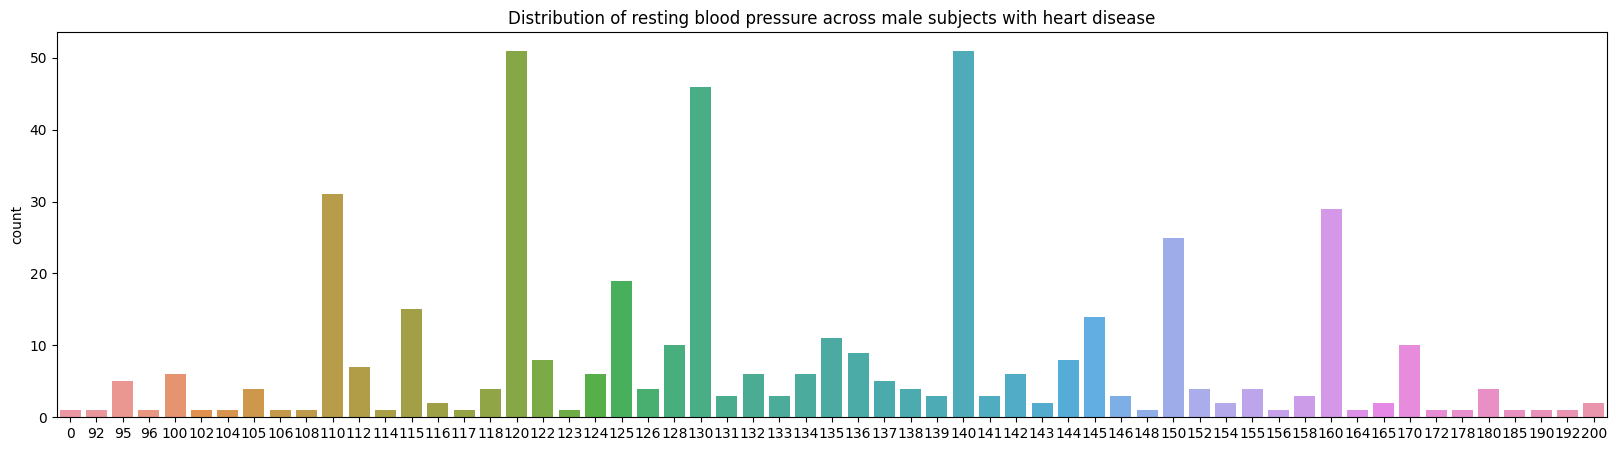

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(x=male_victims_restingBP_ct)
plt.title("Distribution of resting blood pressure across male subjects with heart disease")
plt.show()

From the look at the distribution above and that systolic & diastolic pressure in healthy individuals remain <120 mmHg & <80mmHg respectively we consider the above to be measures of systolic pressures of subjects since for diastolic to reach 200mmHg is absurd.

From above the following rules are applied to categorize a subject having hypertension/high BP:
1. Hypertension (stage-1) : Systolic pressure - 130 to 139 mmHg
2. Hypertension (Stage-2) :  Systolic pressure - >=140 mmHg
3. Hypotension : Systolic pressure - <90 mmHg


A new column is created and marked with suitable values to categorise subjects satisfying any of the conditions laid above to help analyze further.

In [116]:
heartdisease_df['CriticalBP'] = heartdisease_df.apply(lambda row:1 if row['RestingBP']<90 else 2 if row['RestingBP']>=130 and row['RestingBP']<=139 else 3 if row['RestingBP']>=140 else 0,axis=1)
# heartdisease_df = Categorize_Subjects_Basis_RestingBP(heartdisease_df)

In [117]:
heartdisease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,CriticalBP
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,3
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,3
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,2
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,3


In [121]:
bp_types={0:"Healthy",1:"Hypotension",2:"hypertension(stage-1)",3:"Hypertension(stage-2)"}

In [126]:
male_index=list(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().index)

male_legend_lst = []

for i in male_index:
    if bp_types[i] not in male_legend_lst:
        male_legend_lst.append(bp_types[i])

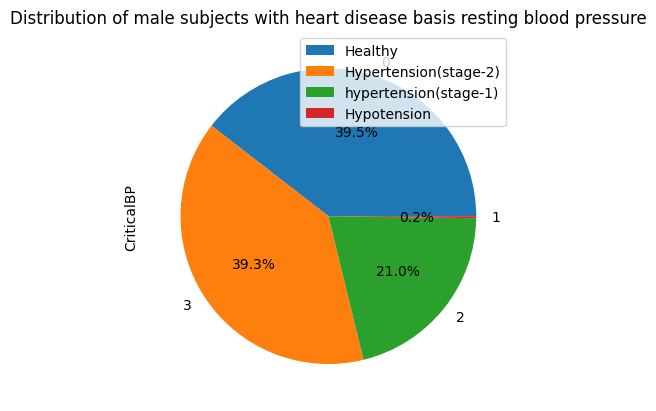

In [127]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of male subjects with heart disease basis resting blood pressure")
plt.legend(male_legend_lst)
plt.show()

In [130]:
female_index=list(heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().index)

female_legend_lst = []

for i in female_index:
    if bp_types[i] not in female_legend_lst:
        female_legend_lst.append(bp_types[i])

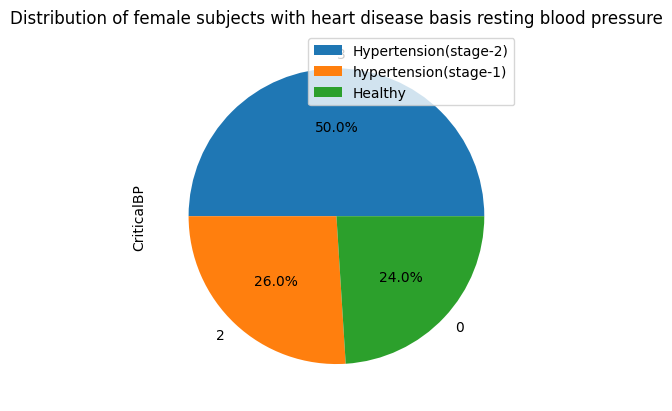

In [131]:
heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['CriticalBP'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of female subjects with heart disease basis resting blood pressure")
plt.legend(female_legend_lst)
plt.show()

From above it's observed that **RestingBP** plays a significant role in determining whether a person suffers from heart-disease. For male heart-disease victims most sufferers are either healthy or show extreme levels of systolic blood pressure while a small number show extremely low levels of blood pressure.

For female sufferers a large number shows elevated systolic blood pressures beyond 140 mmHg whilst almost equal numbers shows either healthy levels or moderately high levels of blood pressure.

It is to note that comparing how healthy subjects in terms of systolic blood pressure measurement suffers from heart-disease male are more at risk of developing heart related diseases than female.

### DISTRIBUTION BASIS ECG

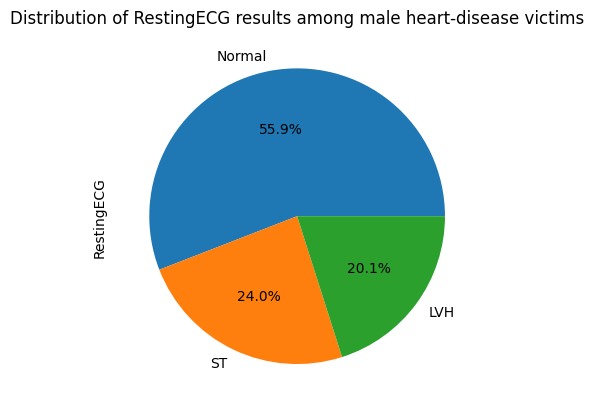

In [54]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['RestingECG'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of RestingECG results among male heart-disease victims")
plt.show()

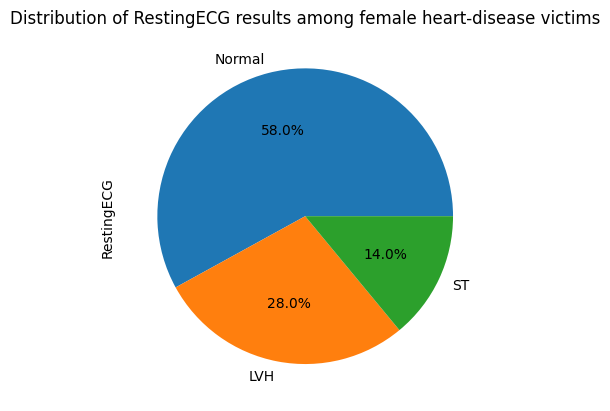

In [55]:
heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['RestingECG'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of RestingECG results among female heart-disease victims")
plt.show()

From above we observe that most heart-disease sufferers have **Normal** heart rate and hence makes it difficult to diagnose chance of stroke/heart-attack merely basis heart rate.

#### ANALYSIS OF MAX HEART RATE IN SUBJECTS SUFFERING FROM HEART DISEASE

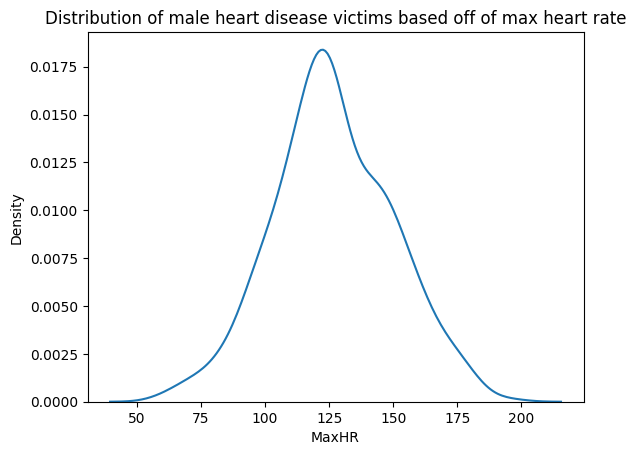

In [61]:


sns.kdeplot(data=pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['MaxHR']),x='MaxHR')
plt.title('Distribution of male heart disease victims based off of max heart rate')
plt.show()

Let us see how the same distribution looks like in case of female.

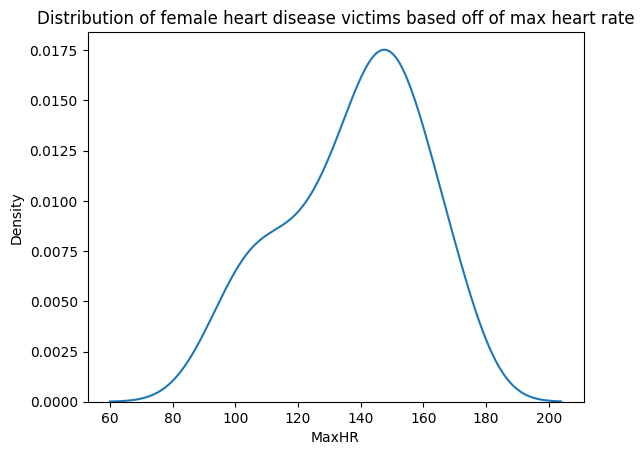

In [59]:
sns.kdeplot(data=pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]),x="MaxHR")
plt.title('Distribution of female heart disease victims based off of max heart rate')
plt.show()

From above it is observed that for most male heart disease victims as compared to most female victims the max heart rate is ~125 bpm(beats per minute) as opposed to ~150 bpm.

### DISTRIBUTION OF HEART DISEASE SUBJECTS BY EXERCISE INDUCED ANGINA
Exercise induced angina often occurs when subject undergoes physical exertion wherein the supply of blood through the coronary arteries reduces going to the heart. Under such circumstances the subject may feel sharp pain in the chest which could even propagate to neck or other areas of the body.

If such angina occurs often it may lead to weakening of heart muscles culmination in heart-attacks/strokes in the long run.

Here we look at the distribution of subjects among ones with heart-disease having had such angina.

In [63]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  CriticalBP      918 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 87.1+ KB


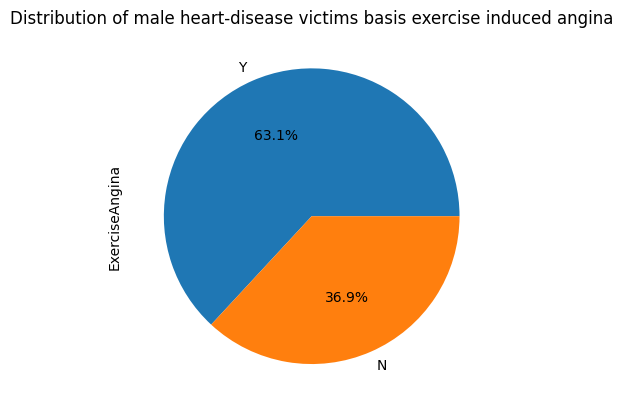

In [67]:
heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]['ExerciseAngina'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of male heart-disease victims basis exercise induced angina")
plt.show()

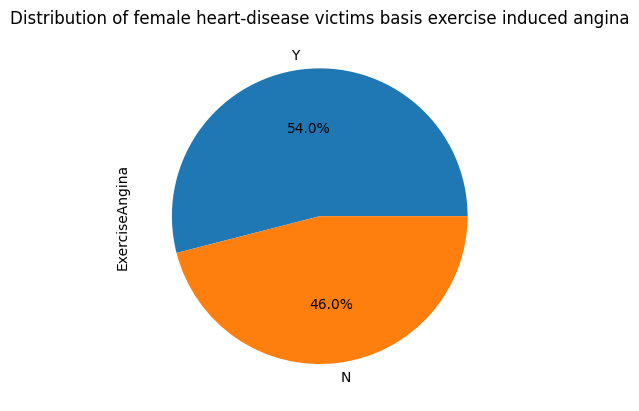

In [68]:
heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]['ExerciseAngina'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.title("Distribution of female heart-disease victims basis exercise induced angina")
plt.show()

From above it is observed that amongst male subjects with heart-disease a majority of them experienced **Exercise Angina** while near about half of the female heart-disease subjects had had experience of the same.

### DISTRIBUTION OF SUBJECTS WITH HEART-DISEASE BASED ON CHOLESTEROL VALUES


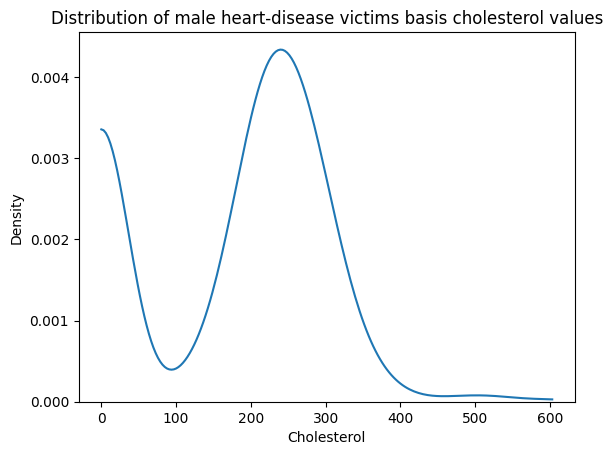

In [74]:
sns.kdeplot(data=pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]),x='Cholesterol',cut=0)
plt.title("Distribution of male heart-disease victims basis cholesterol values")
plt.show()

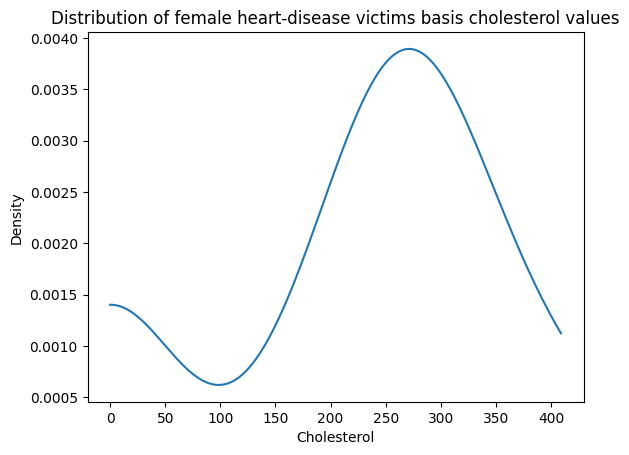

In [75]:
sns.kdeplot(data=pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]),x='Cholesterol',cut=0)
plt.title("Distribution of female heart-disease victims basis cholesterol values")
plt.show()

From above it is observed that male victims show elevated cholesterol levels as compared to female. Although for both it is around ~200-300 mm/dL cholesterol level with maximum 
heart-disease victims for male the number is more.

## CORRELATION - HEATMAP
**Correlation** represents strength of relationships between pairs of attributes/columns/features. 

**Positive Correlation** => With increase or decrease of one attribute another increases or reduces
**Negative Correlation** => With rise/fall of one variable another increases/reduces.
**No Correlation** => When there exists no impact of an attribute changing on another.

To check relationships across different attrbutes of the dataframe correlation is computed.

In [132]:
heartdisease_df.corr()

/var/folders/_d/d0_pf6hn3t5gl_r_tykfvcxh0000gn/T/ipykernel_5599/2989802546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heartdisease_df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,CriticalBP
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.244176
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.812306
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.102776
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.046706
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.082593
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.170803
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.083870
CriticalBP,0.244176,0.812306,0.102776,0.046706,-0.082593,0.170803,0.083870,1.000000


From above it is seen that there exists no strong correlation between any pair of attributes.

Looking just at numbers might be difficult to ascertain what kind of relationship does exists between any pair of attributes in which case a **HEATMAP** is used.

/var/folders/_d/d0_pf6hn3t5gl_r_tykfvcxh0000gn/T/ipykernel_5599/872924627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(heartdisease_df.corr(),annot=True,cmap='crest')


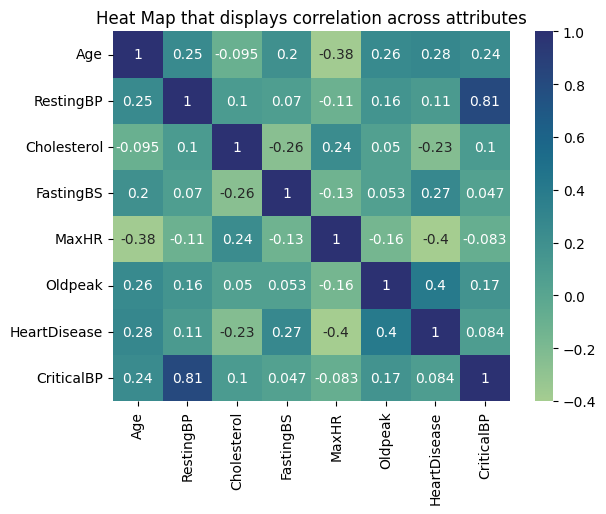

In [148]:
ax=sns.heatmap(heartdisease_df.corr(),annot=True,cmap='crest')
plt.title("Heat Map that displays correlation across attributes")
plt.show()

From above it's seen that a couple of columns do show even if not a strong relationship but somewhere moderate. To see how they look like the respective pair of attributes are plotted via a scatterplot.

### USING JOINTPLOT TO VISUALIZE STRENGTH OF RELATIONSHIPS BETWEEN PAIR OF ATTRIBUTES

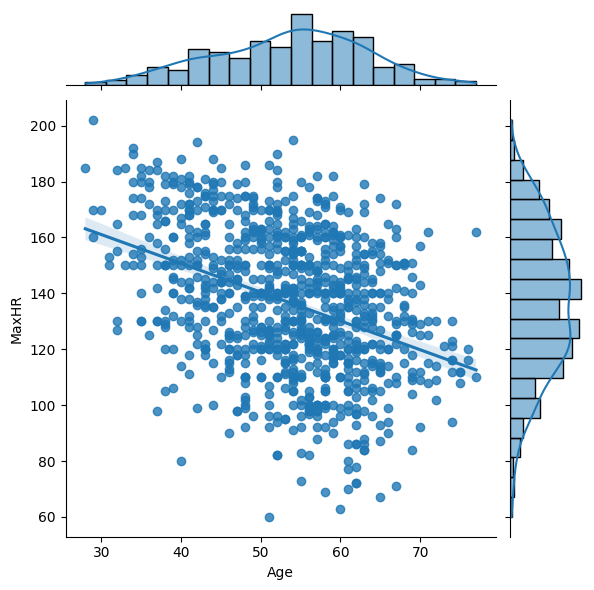

In [141]:
sns.jointplot(data=heartdisease_df,x='Age',y='MaxHR',kind='reg')

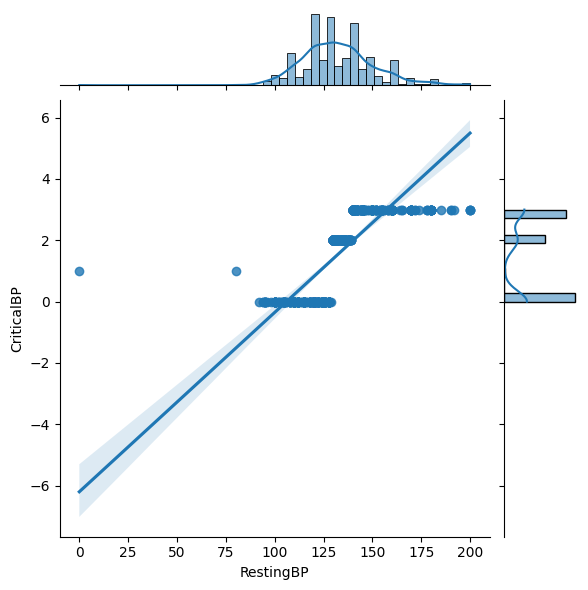

In [147]:
sns.jointplot(data=heartdisease_df,x='RestingBP',y='CriticalBP',kind='reg')

### VISUALISE CORRELATION FOR HEART DISEASE VICTIMS

/var/folders/_d/d0_pf6hn3t5gl_r_tykfvcxh0000gn/T/ipykernel_5599/3870076249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]).corr(),cmap='crest',annot=True)


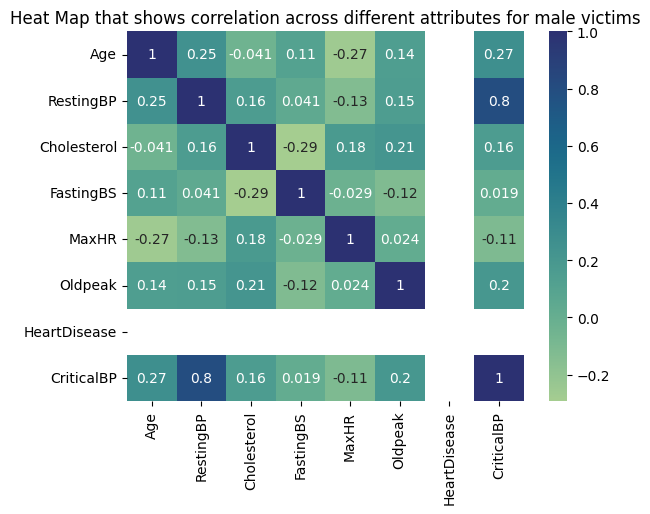

In [155]:
sns.heatmap(pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['M'])) & (heartdisease_df['HeartDisease']==1)]).corr(),cmap='crest',annot=True)
plt.title("Heat Map that shows correlation across different attributes for male victims")
plt.show()

/var/folders/_d/d0_pf6hn3t5gl_r_tykfvcxh0000gn/T/ipykernel_5599/227254355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]).corr(),cmap='crest',annot=True)


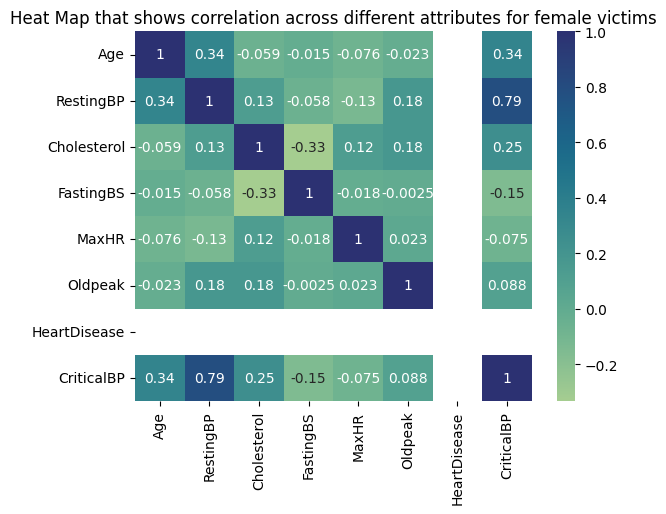

In [156]:
sns.heatmap(pd.DataFrame(heartdisease_df[(heartdisease_df['Sex'].isin(['F'])) & (heartdisease_df['HeartDisease']==1)]).corr(),cmap='crest',annot=True)
plt.title("Heat Map that shows correlation across different attributes for female victims")
plt.show()

### VISUALISE SCATTERPLOT FOR EVERY POSSIBLE PAIR OF ATTRIBUTES

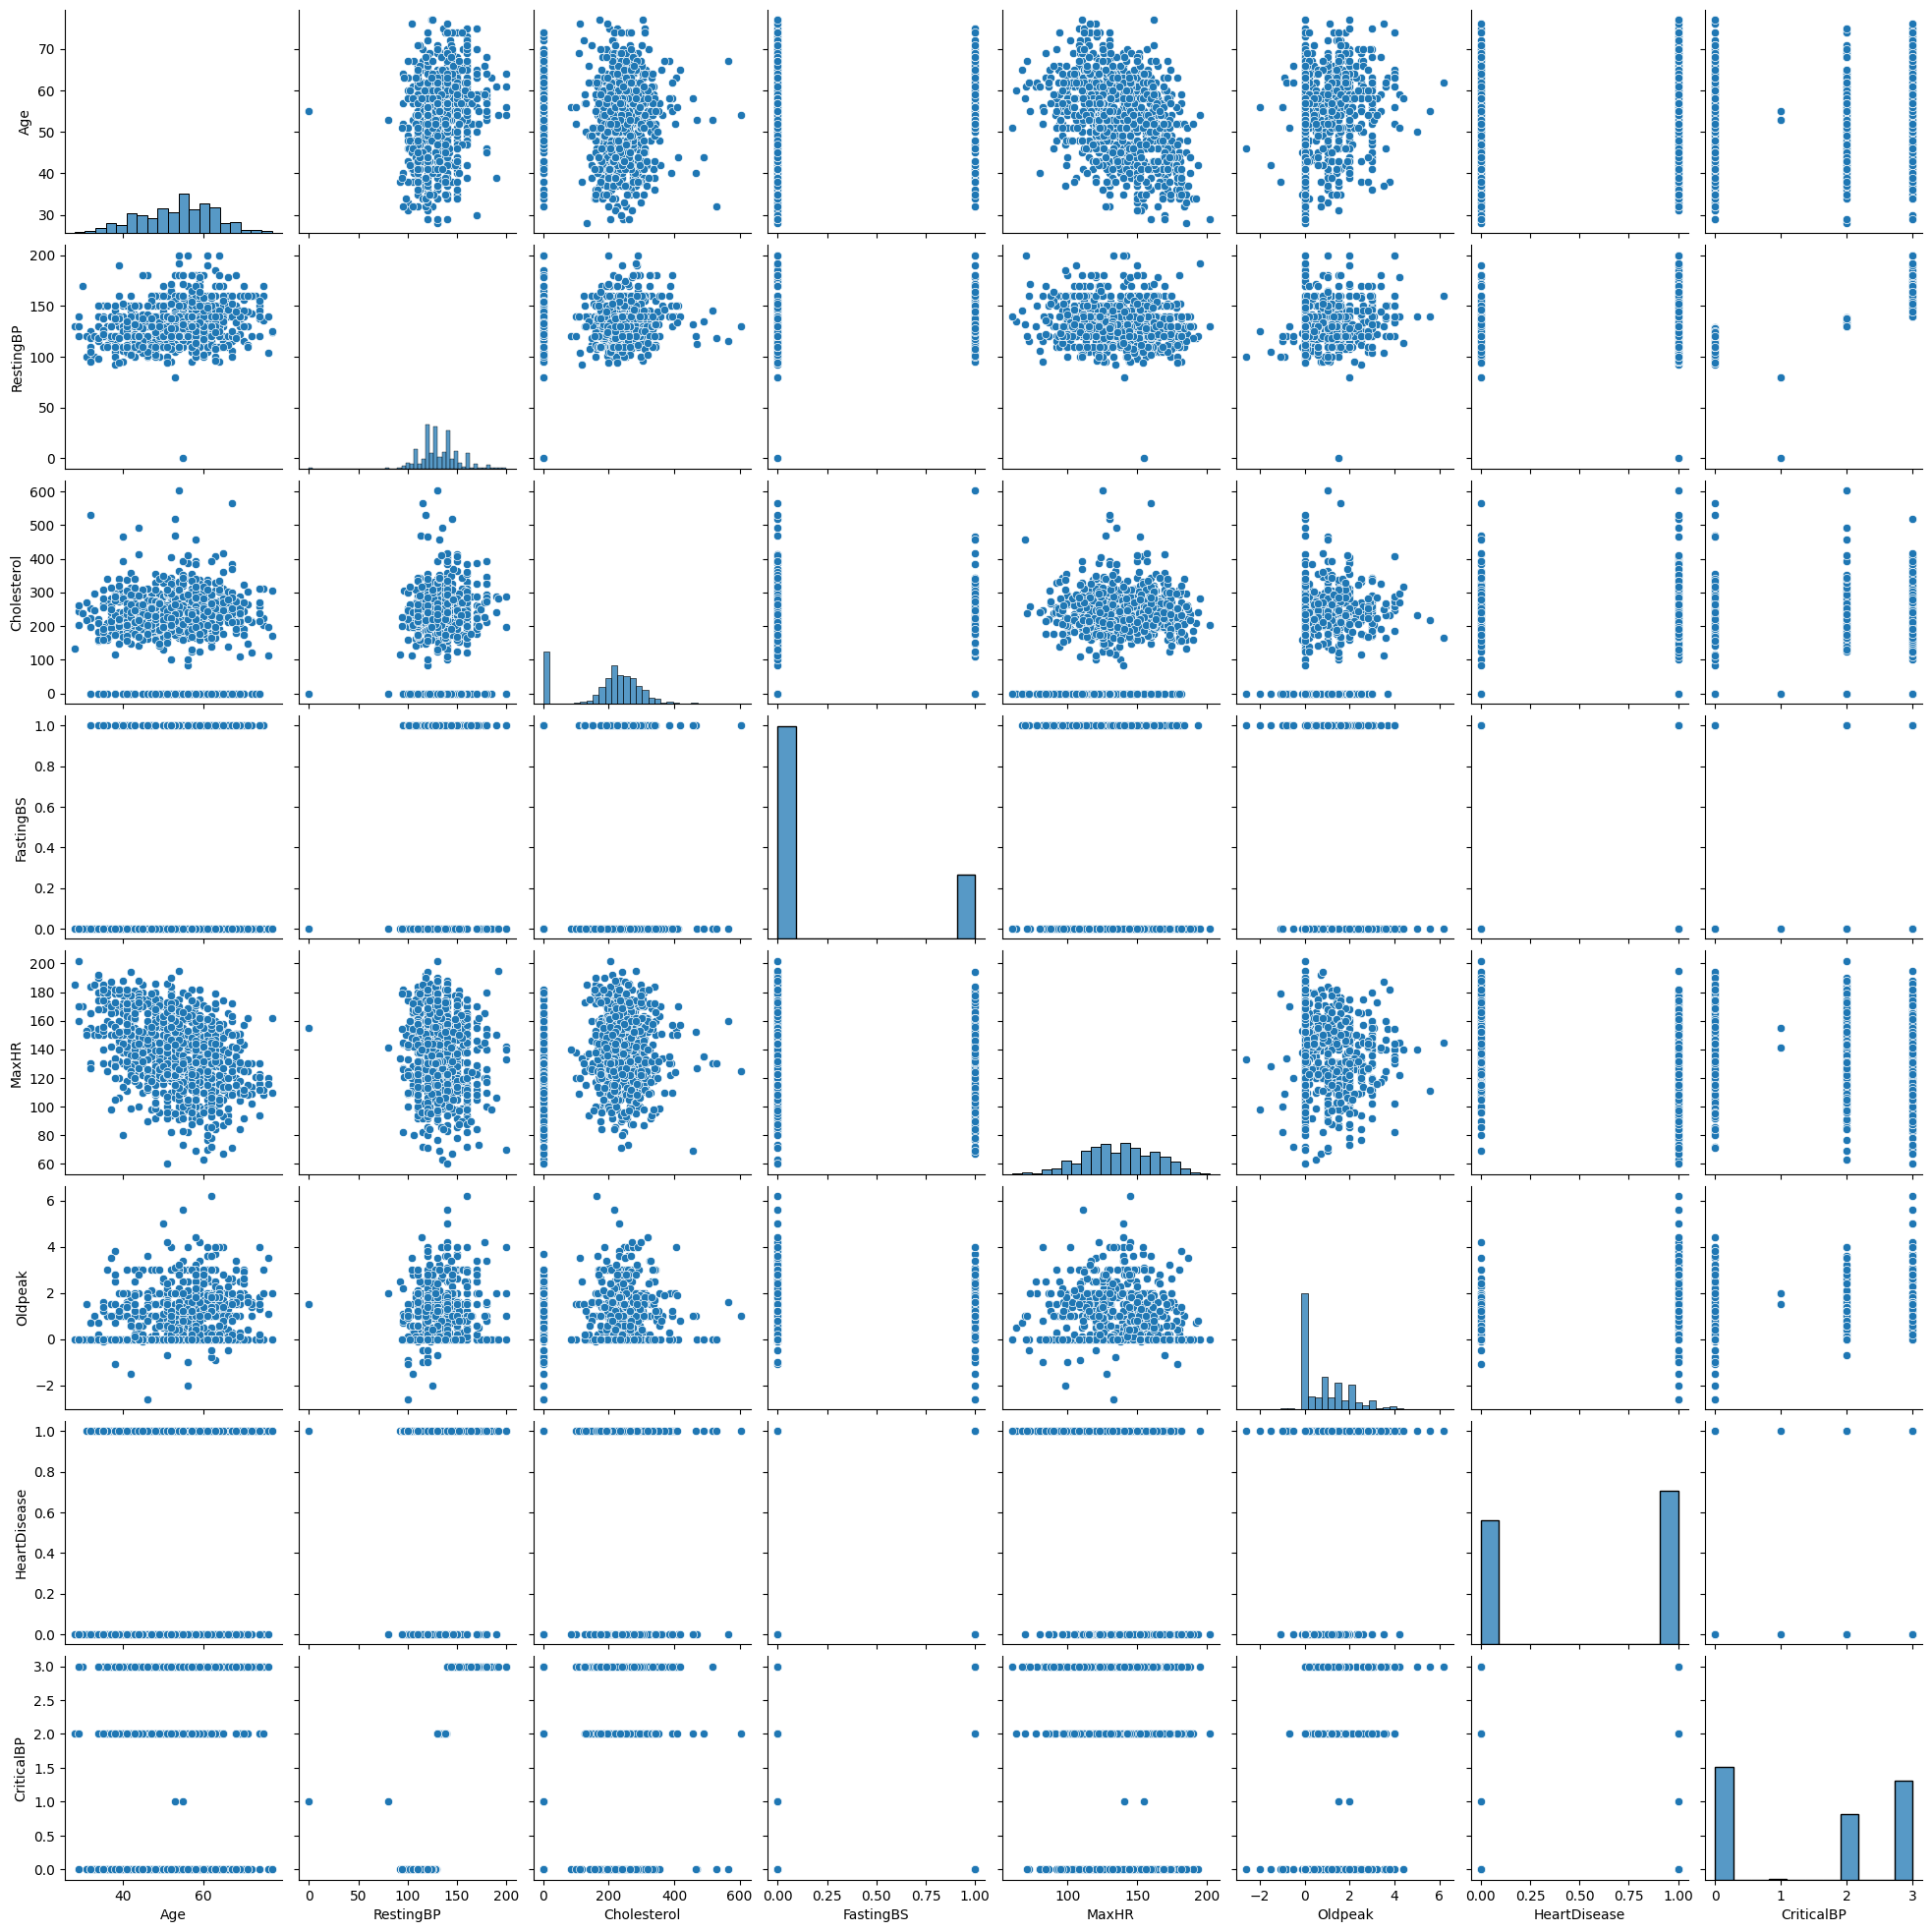

In [157]:
sns.pairplot(data=heartdisease_df)